In [47]:
using  Plots, Optim, Dates, DiffEqParamEstim, Flux, DiffEqFlux, OrdinaryDiffEq

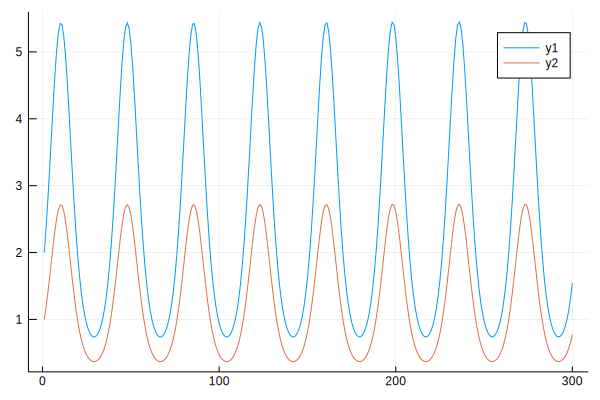

In [62]:
# Start conditions for the two species in the system
u0 = Float32[2.; 1.]
# Number of evaluations of the neural ODE. It relates to the numbers of layers of the neural net (depth of network).
datasize = 300
# Time span in which of evaluation will be and actual timepoints of evaluations
tspan = (0.0f0, 50.f0)
t = range(tspan[1], tspan[2], length = datasize)
# The true ODE (with the true parameters) which the neural net should learn
function trueODEfunc(du, u, p, t)
    du[1]=u[1]*cos(t)
    du[2]=u[2]*cos(t)
end
# Construction of the ODEProblem and solving the ODEProblem with Tsit5 solver
prob = ODEProblem(trueODEfunc, u0, tspan)
ode_data = Array(solve(prob,Tsit5(),saveat=t))
plot(ode_data')

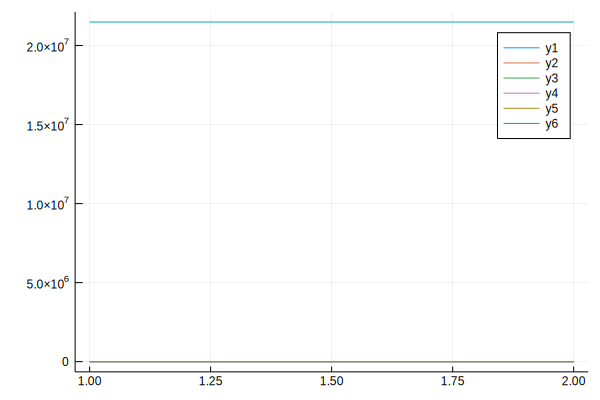